In [25]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [26]:
df = pd.read_csv(os.path.join("exoplanet_data.csv"))
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [27]:
y = df["koi_disposition"]
#target_names = ["negative", "positive"]

In [28]:
X = df.drop("koi_disposition", axis=1)
X.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6122,0,0,0,0,6.768901,7.380000e-05,-7.380000e-05,133.077240,0.008440,-0.008440,...,-171,4.327,0.153,-0.187,1.125,0.310,-0.207,294.40472,39.351681,14.725
6370,0,1,0,1,0.733726,6.060000e-06,-6.060000e-06,132.020050,0.007950,-0.007950,...,-175,4.578,0.033,-0.187,0.797,0.211,-0.056,284.50391,42.463860,15.770
2879,1,0,0,0,7.652707,6.540000e-05,-6.540000e-05,134.460380,0.006190,-0.006190,...,-189,4.481,0.050,-0.200,0.963,0.290,-0.097,295.50211,38.983540,13.099
107,0,0,0,0,7.953547,1.910000e-05,-1.910000e-05,174.662240,0.001820,-0.001820,...,-85,4.536,0.056,-0.016,0.779,0.023,-0.049,291.15878,40.750271,15.660
29,0,0,0,0,4.959319,5.150000e-07,-5.150000e-07,172.258529,0.000083,-0.000083,...,-77,4.359,0.110,-0.110,1.082,0.173,-0.130,292.16705,48.727589,15.263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,1,0,0,8.268081,6.340000e-07,-6.340000e-07,135.056330,0.000064,-0.000064,...,-190,4.502,0.050,-0.200,0.922,0.273,-0.091,292.53125,46.728699,15.768
5191,0,0,0,0,11.161938,1.677000e-04,-1.677000e-04,133.553800,0.013000,-0.013000,...,-124,4.072,0.188,-0.101,1.640,0.281,-0.343,295.21268,49.562180,13.374
5226,0,1,0,0,6.150251,7.000000e-07,-7.000000e-07,134.422825,0.000088,-0.000088,...,-458,3.896,0.270,-0.180,2.867,0.988,-1.087,297.18176,45.988441,10.622
5390,1,0,0,0,3.343285,4.380000e-05,-4.380000e-05,134.845100,0.011200,-0.011200,...,-197,3.773,0.293,-0.098,2.652,0.433,-0.939,296.86258,41.147419,13.276


In [30]:
# Set features. This will also be used as your x values.
X = df[['koi_fpflag_nt', 'koi_period', 
                        'koi_time0bk', 'koi_srad', 'koi_duration', 'koi_depth', 'koi_teq']]
X.head()

,koi_fpflag_nt,koi_period,koi_time0bk,koi_srad,koi_duration,koi_depth,koi_teq
0,0,54.418383,162.513840,0.927,4.50700,874.8,443
1,0,19.899140,175.850252,0.868,1.78220,10829.0,638
2,0,1.736952,170.307565,0.791,2.40641,8079.2,1395
3,0,2.525592,171.595550,1.046,1.65450,603.3,1406
4,0,4.134435,172.979370,0.972,3.14020,686.0,1160


In [31]:
y_train

6122         CANDIDATE
6370    FALSE POSITIVE
2879    FALSE POSITIVE
107          CONFIRMED
29           CANDIDATE
             ...      
3772    FALSE POSITIVE
5191         CANDIDATE
5226    FALSE POSITIVE
5390    FALSE POSITIVE
860     FALSE POSITIVE
Name: koi_disposition, Length: 5243, dtype: object

In [32]:
# Set features. This will also be used as your x values.
X = df[['koi_time0bk']]
X.head()

,koi_time0bk
0,162.513840
1,175.850252
2,170.307565
3,171.595550
4,172.979370


k: 1, Train/Test Score: 1.000/0.601
k: 3, Train/Test Score: 0.791/0.624
k: 5, Train/Test Score: 0.746/0.625
k: 7, Train/Test Score: 0.727/0.637
k: 9, Train/Test Score: 0.717/0.636
k: 11, Train/Test Score: 0.712/0.639
k: 13, Train/Test Score: 0.706/0.644
k: 15, Train/Test Score: 0.698/0.641
k: 17, Train/Test Score: 0.691/0.634
k: 19, Train/Test Score: 0.687/0.634
k: 21, Train/Test Score: 0.686/0.632
k: 23, Train/Test Score: 0.682/0.639


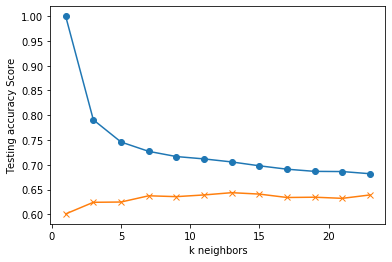

In [33]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 25, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 25, 2), train_scores, marker='o')
plt.plot(range(1, 25, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [34]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test, y_test))

k=13 Test Acc: 0.644


In [35]:
target_names

['negative', 'positive']